In [10]:
import sys
sys.path.append("D:\python\lib\site-packages")
import pyxdf as xdf
import numpy as np
import matplotlib.pyplot as plt
import mne
%matplotlib notebook

### Load your data from the .xdf file

In [11]:
# Load file
streams = xdf.load_xdf("yoshe_test.xdf")

# Extract streams
unitystr_time_series     = streams[0][0]['time_series']
unitystr_time_stamps     = streams[0][0]['time_stamps']
unitystr_first_timestamp = np.float(unitystr_time_stamps[0])#np.float(streams[0][0]['footer']['info']['first_timestamp'][2])

openvibemarkers_time_series     = streams[0][1]['time_series']
openvibemarkers_time_stamps     = streams[0][1]['time_stamps']
openvibemarkers_first_timestamp = np.float(streams[0][1]['footer']['info']['first_timestamp'][0])

eeg_time_series     = streams[0][2]['time_series']
eeg_time_stamps     = streams[0][2]['time_stamps']
eeg_first_timestamp = np.float(streams[0][2]['footer']['info']['first_timestamp'][0])

# Sampling frequency of the recorded eeg data
sfreq = np.float(streams[0][2]['info']['nominal_srate'][0])

In [58]:
xdf.load_xdf("yoshe_test.xdf")

([{'info': defaultdict(list,
               {'name': ['UnityData Stram'],
                'type': ['LSL_Marker_Strings'],
                'channel_count': ['1'],
                'nominal_srate': ['0'],
                'channel_format': ['string'],
                'source_id': ['D3F83BB699EB49AB94A9FA44B88882AB'],
                'version': ['1.1000000000000001'],
                'created_at': ['2893.0703176000002'],
                'uid': ['8b3d36d2-1312-436a-bc82-29dbee79b6c7'],
                'session_id': ['default'],
                'hostname': ['LAPTOP-JQKQ10DS'],
                'v4address': [None],
                'v4data_port': ['16572'],
                'v4service_port': ['16572'],
                'v6address': [None],
                'v6data_port': ['16572'],
                'v6service_port': ['16572'],
                'desc': [None],
                'effective_srate': 0}),
   'footer': {'info': defaultdict(list,
                {'first_timestamp': ['287.5280456542969'],
    

In [31]:
#Convert labels to codes: 1-chose high, 2-chose low, 3- Reward high, 4-reward low, 5-no reward

for i in range (len(unitystr_time_series)):
    if "PressedHigh" in str(unitystr_time_series[i]):
        unitystr_time_series[i]=1
    elif "PressedLow" in str(unitystr_time_series[i]):
        unitystr_time_series[i]=2
    elif "RewardHigh" in str(unitystr_time_series[i]):
        unitystr_time_series[i]=3
    elif "RewardLow" in str(unitystr_time_series[i]):
        unitystr_time_series[i]=4
    elif "RewardNone" in str(unitystr_time_series[i]):
        unitystr_time_series[i]=5
        

In [56]:
print(unitystr_time_series)
len(unitystr_time_series)

[2, 5, 1, 3, 1, 3, 1, 3, 1, 3, 1, 5, 1, 3, 1, 3, 1, 3, 1, 3, 1, 5, 1, 5, 1, 5, 1, 3, 1, 3, 1, 3, 1, 5, 2, 5, 1, 5, 1, 3, 1, 3, 1, 5, 1, 5, 1, 3, 1, 5, 1, 3, 1, 5, 1, 5, 1, 5, 1, 3, 1, 3, 1, 3, 1, 3, 1, 5, 1, 5, 1, 3, 1, 3, 1, 3, 1, 5, 1, 5, 1, 5, 1, 3, 1, 5, 1, 3, 1, 5, 2, 5, 1, 3, 1, 5, 1, 5, 1, 5]


100

In [57]:
print(unitystr_time_stamps)
len(unitystr_time_stamps) #[AS comment]as you can see below and directly in the xdf file above unity timestamps end around 687 and eeg itmestamps around 600. I checked a CSV file made using Hector's script and there in . the result of his find_nearest function I guess we lost all markers after 39th trial. Looks like our synchronisation process has some flow=(

[287.52802238 288.75431022 300.53610958 304.11734738 309.83447997
 314.32666748 317.85471315 323.14215823 329.57456181 334.57688117
 340.12674691 345.52860239 351.77725964 356.53211195 359.0202101
 364.56024918 368.65421281 374.17218768 376.52454365 382.09226217
 384.12955466 389.74689476 391.93823998 397.38925929 399.72556301
 405.3258743  408.36042021 413.69620514 415.71732331 421.35141756
 423.26078036 428.87860875 430.93244176 436.568245   438.83798988
 444.39038858 446.49436198 451.94535076 454.2481767  459.94858565
 461.95526901 467.60715501 469.18140428 474.85199756 477.63871022
 483.24051688 485.32764457 490.94651055 492.80213189 498.48542049
 500.3429034  505.97748594 507.99897032 513.58463318 515.67160828
 521.08969912 523.02909122 528.51554143 531.18338812 536.85007515
 538.64267769 544.19565622 545.90213816 551.48642773 553.53977246
 558.86118361 561.06485793 566.73203324 569.39957476 574.98325397
 577.09104207 582.3605123  584.08268027 589.76651818 591.62168176
 597.223915

100

In [33]:
eeg_time_stamps

array([153.62500095, 153.63281345, 153.64062595, ..., 600.9140614 ,
       600.9218739 , 600.9296864 ])

### Create a RAW array object to store the EEG data

In [34]:
# 14 channels: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4

ch_names = ('AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4')

# Create the info file
info = mne.create_info(ch_names, sfreq, ch_types='eeg' )

# Convert first time to sample
first_samp = int(eeg_first_timestamp*sfreq)
print(first_samp)

19664


In [35]:
# NB set the first sample to be able to align the events
raw = mne.io.RawArray(eeg_time_series.T, info, first_samp=first_samp)

# raw.set_eeg_reference()

Creating RawArray with float64 data, n_channels=14, n_times=57256
    Range : 19664 ... 76919 =    153.625 ...   600.930 secs
Ready.


### Set montage

<IPython.core.display.Javascript object>


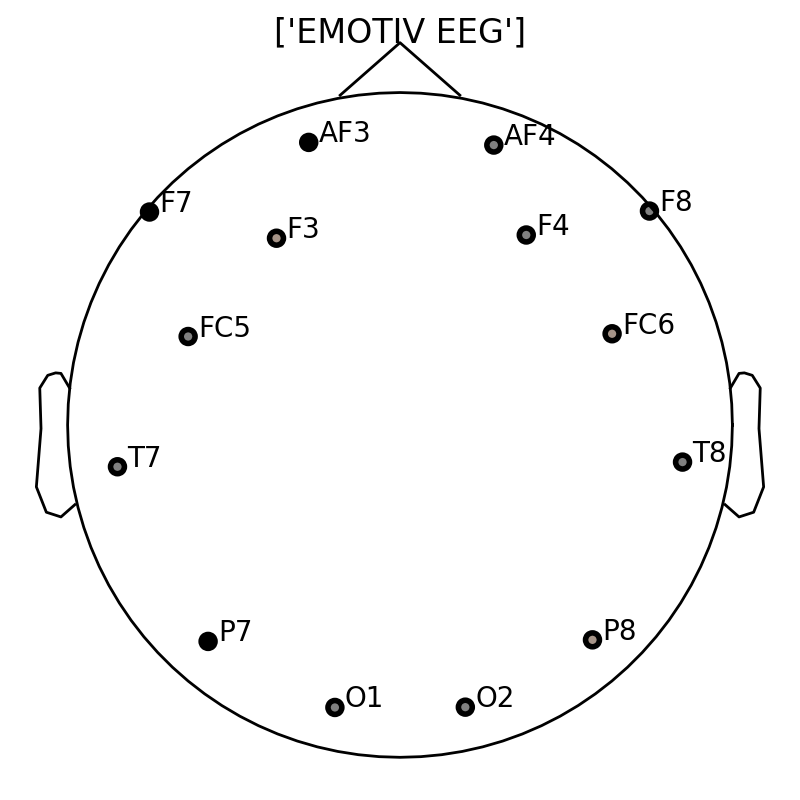

In [36]:
montage = mne.channels.read_montage('standard_1020')

raw.set_montage(montage)
f = raw.plot_sensors(ch_type='eeg', title=['EMOTIV EEG'], show_names=True, ch_groups='position', show=False)
f.set_size_inches(4,4)

<IPython.core.display.Javascript object>


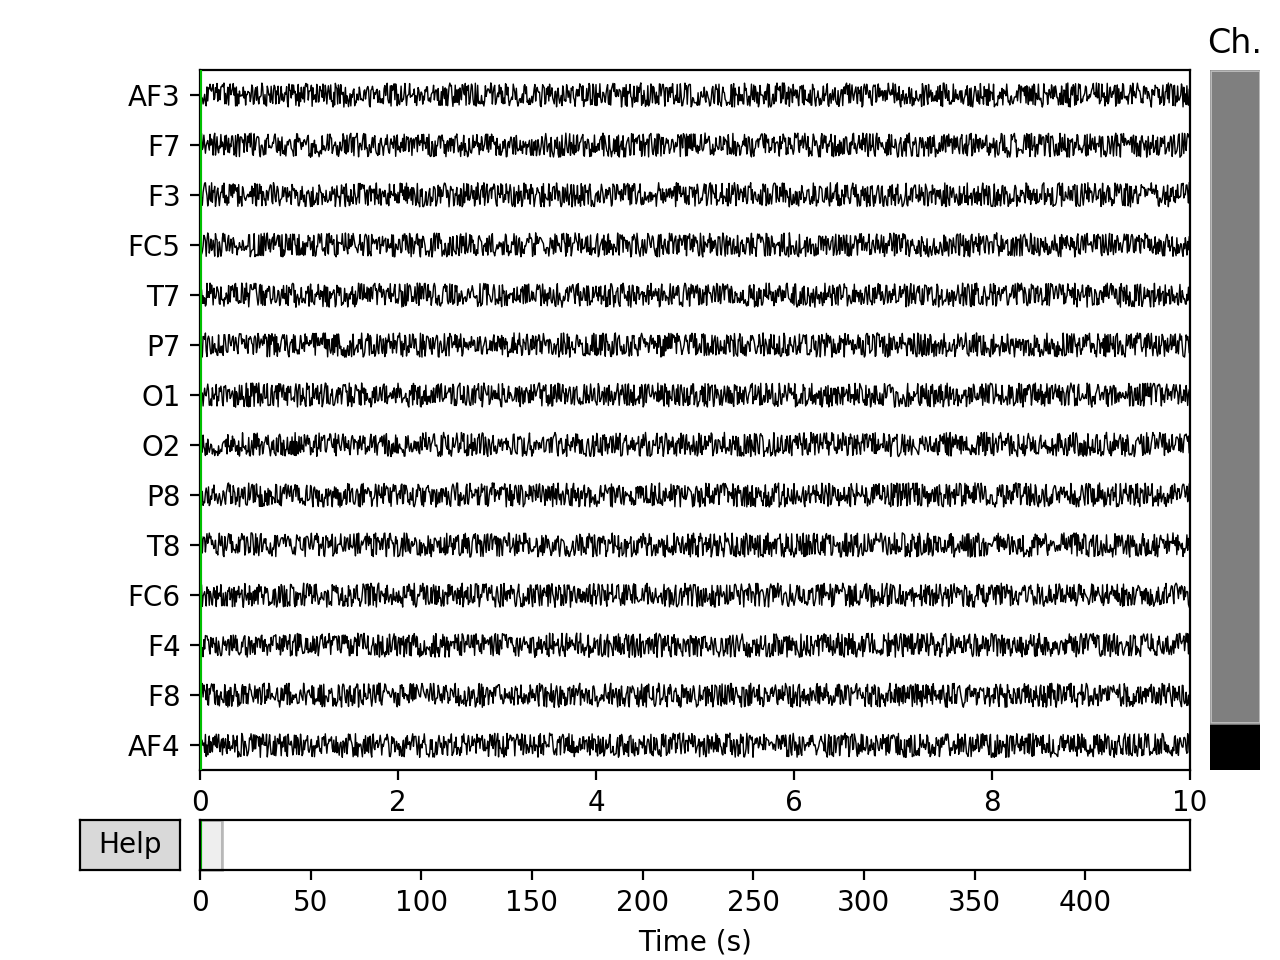

<IPython.core.display.Javascript object>


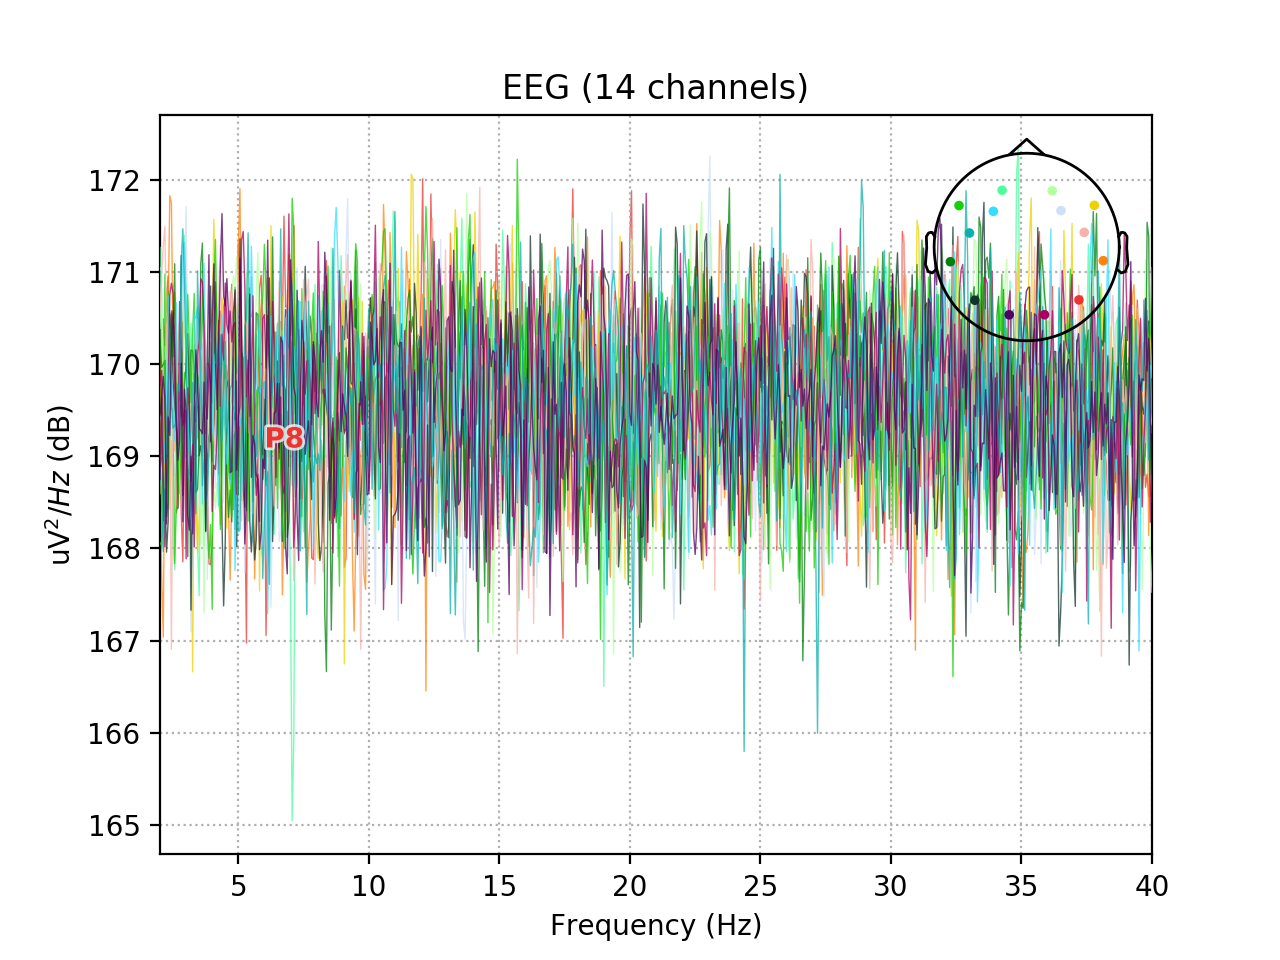

Effective window size : 16.000 (s)


<ipython-input-45-2b65ab931e7a>:4: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  raw.plot_psd(fmin=2.0, fmax=40.0, show=False);


In [45]:
# Plot some data
raw.plot(scalings='auto', n_channels=14, show=False);

raw.plot_psd(fmin=2.0, fmax=40.0, show=False);

### Define the event channel

In [46]:
# Create a ne stimulation channels
info         = mne.create_info(['STI'], raw.info['sfreq'], ch_types=['stim'])
# Fill it with an vector of zeros
stim_data    = np.zeros((1, len(raw.times)))

In [47]:
stim_raw     = mne.io.RawArray(stim_data, info, first_samp=first_samp)

Creating RawArray with float64 data, n_channels=1, n_times=57256
    Range : 19664 ... 76919 =    153.625 ...   600.930 secs
Ready.


In [49]:
# Add the new channel to your dataset
raw.add_channels([stim_raw], force_update_info=False)

ValueError: The following channels are present in more than one input measurement info objects: ['STI']

In [50]:
(unitystr_time_stamps*sfreq).astype('int')

array([36803, 36960, 38468, 38927, 39658, 40233, 40685, 41362, 42185,
       42825, 43536, 44227, 45027, 45636, 45954, 46663, 47187, 47894,
       48195, 48907, 49168, 49887, 50168, 50865, 51164, 51881, 52270,
       52953, 53211, 53932, 54177, 54896, 55159, 55880, 56171, 56881,
       57151, 57849, 58143, 58873, 59130, 59853, 60055, 60781, 61137,
       61854, 62121, 62841, 63078, 63806, 64043, 64765, 65023, 65738,
       66005, 66699, 66947, 67649, 67991, 68716, 68946, 69657, 69875,
       70590, 70853, 71534, 71816, 72541, 72883, 73597, 73867, 74542,
       74762, 75490, 75727, 76444, 76684, 77403, 77649, 78372, 78627,
       79352, 79579, 80302, 80519, 81246, 81486, 82191, 82405, 83126,
       83357, 84083, 84263, 84995, 85171, 85899, 86100, 86821, 87593,
       88029])

In [42]:
# You need to build an array of events
#events = np.array(((openvibemarkers_time_stamps*sfreq).astype('int'), np.zeros((len(openvibemarkers_time_series),)), np.squeeze(openvibemarkers_time_series)))


In [52]:
# You need to build an array of events
events = np.array(((unitystr_time_stamps*sfreq).astype('int'), np.zeros((len(unitystr_time_series),)), np.squeeze([unitystr_time_series])))


In [44]:
print(events)

[[3.6803e+04 3.6960e+04 3.8468e+04 3.8927e+04 3.9658e+04 4.0233e+04
  4.0685e+04 4.1362e+04 4.2185e+04 4.2825e+04 4.3536e+04 4.4227e+04
  4.5027e+04 4.5636e+04 4.5954e+04 4.6663e+04 4.7187e+04 4.7894e+04
  4.8195e+04 4.8907e+04 4.9168e+04 4.9887e+04 5.0168e+04 5.0865e+04
  5.1164e+04 5.1881e+04 5.2270e+04 5.2953e+04 5.3211e+04 5.3932e+04
  5.4177e+04 5.4896e+04 5.5159e+04 5.5880e+04 5.6171e+04 5.6881e+04
  5.7151e+04 5.7849e+04 5.8143e+04 5.8873e+04 5.9130e+04 5.9853e+04
  6.0055e+04 6.0781e+04 6.1137e+04 6.1854e+04 6.2121e+04 6.2841e+04
  6.3078e+04 6.3806e+04 6.4043e+04 6.4765e+04 6.5023e+04 6.5738e+04
  6.6005e+04 6.6699e+04 6.6947e+04 6.7649e+04 6.7991e+04 6.8716e+04
  6.8946e+04 6.9657e+04 6.9875e+04 7.0590e+04 7.0853e+04 7.1534e+04
  7.1816e+04 7.2541e+04 7.2883e+04 7.3597e+04 7.3867e+04 7.4542e+04
  7.4762e+04 7.5490e+04 7.5727e+04 7.6444e+04 7.6684e+04 7.7403e+04
  7.7649e+04 7.8372e+04 7.8627e+04 7.9352e+04 7.9579e+04 8.0302e+04
  8.0519e+04 8.1246e+04 8.1486e+04 8.2191e+04 8.

In [53]:
# Add the openvibe events
raw.add_events(events.T, stim_channel='STI')

ValueError: event sample numbers must be between 19664 and 76919

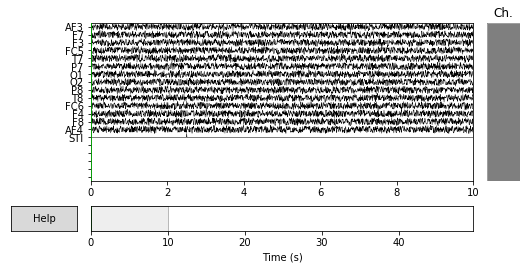

In [50]:
f = raw.plot(scalings='auto', show=False)
f.set_size_inches(8,4)

In [51]:
### Re-reference your data
raw.set_eeg_reference()

Applying average reference.
Applying a custom EEG reference.


<RawArray  |  None, n_channels x n_times : 15 x 6356 (49.6 sec), ~787 kB, data loaded>

### Epoching data

In [52]:
## evs should return the same 'events' array you used to create the channel ( I did it just to confirm that all the events are there)


# With the option output='onset' we find only 26 events NB EVENTS ARE VERY CLOSE (JUST 1 TIMESTAMP BETWEEN TWO EVENTS)
# If you set it to 'step' you will have back all the 52 events (but it does not make sense for epoching your data)



evs = mne.find_events(raw, stim_channel='STI', output='onset', shortest_event=1,
                         min_duration=1/raw.info['sfreq'])
print('Number of events found: %d' % len(evs))

4 events found
Event IDs: [2]
Number of events found: 4


In [53]:
# Pick the channels you want to include 
reject = dict(eeg=150e-6) # you can set a rejection threshold for bad data (NB in this case all data will be discarded)

baseline = (None,None)
picks = mne.pick_types(raw.info, meg=False, eeg=True, ecg=False, eog=False, stim=False, exclude=[])


# Define the beginning and the end of each epoch
tmin = -1.
tmax = 2.5

# Epoch the data around event 1 (here defined as "trial_start")
epochs =  mne.Epochs(raw, evs, tmin=tmin, tmax=tmax, 
                     baseline=baseline, preload=True, reject=None)

# Check if all the epochs (nr of trials in the experiment) were extracted
print('Number of epochs: %d' % len(epochs))

4 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 4 events and 449 original time points ...
0 bad epochs dropped
Number of epochs: 4


In [56]:
epochs.events

array([[ 8209,     0,     2],
       [ 9378,     0,     2],
       [10432,     0,     2],
       [11122,     0,     2]])

In [ ]:
#mne extract power; take windows of 100ms and average the values of these (windowlength and overlapping of the time windows is up to us)or 500ms and moving of 200, etc normally overlapping is 80%. it will be a vector of all the freq values of this timeframe and those can be fed to the network. he suggests recurrent network. make it parametric so we can modify variables. important to put labels